In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [55]:
%matplotlib inline

In [2]:
df = pd.read_csv('linkedin.csv')

c:\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


# Analyze the data to see top N growing industries based on job postings

Focus on the entire data set to get a general idea of growth over 3 years. For more specific analysis could focus down on a certain time period.

In [158]:
temp = df.groupby(['as_of_date','industry']).agg({'industry':"count"})

In [159]:
temp.columns = ['industry_count']

In [160]:
temp.reset_index(inplace=True)  

In [161]:
temp.as_of_date = pd.to_datetime(temp.as_of_date)

In [168]:
biotplot.figure.savefig('biotplot')

In [70]:
np.polyfit(range(len(temp[temp.industry == 'Aviation & Aerospace'].industry_count)), temp[temp.industry == 'Aviation & Aerospace'].industry_count, deg = 1)

array([ 0.04397481, -1.05848893])

In [71]:
a = temp.groupby('industry')

In [99]:
ind_col = []
slope_col = []
offset_col = []
for ind in temp.industry.unique():
    m, b = np.polyfit(range(len(temp[temp.industry == ind].industry_count)), temp[temp.industry == ind].industry_count, deg = 1)
    ind_col.append(ind)
    slope_col.append(m)
    offset_col.append(b)
inddf = pd.DataFrame()
inddf['industry'] = ind_col
inddf['slope'] = slope_col
inddf['offset'] = offset_col

In [102]:
inddf['scaled_offset'] = inddf['slope']/max(inddf.slope)

In [106]:
top10 = sorted(inddf.scaled_offset,reverse=True)[10]

In [112]:
inddf=inddf.sort_values(by=['scaled_offset'],ascending=False)

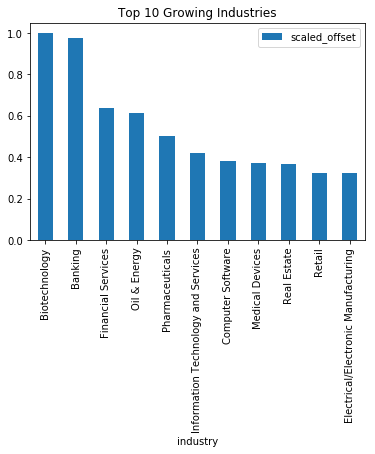

In [169]:
topindplot = inddf[inddf.scaled_offset >= top10].plot(x='industry',y='scaled_offset', kind='bar',title='Top 10 Growing Industries')
topindplot.figure.savefig('top10indplot')

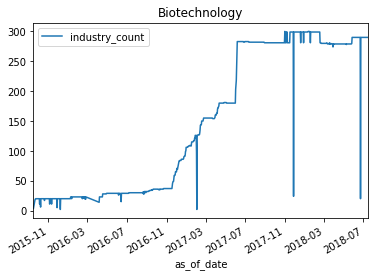

In [163]:
biotplot = temp[temp.industry == 'Biotechnology'].plot(x = 'as_of_date', y='industry_count',title='Biotechnology')

# Looking at individual industries to see top hiring companies

In [123]:
biodf = df[df.industry == 'Biotechnology']
biodf.as_of_date = pd.to_datetime(biodf.as_of_date)

c:\python\python35\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [131]:
bio = biodf.groupby(['company_name',pd.Grouper(key = 'as_of_date',freq='M')]).agg({'company_name':"count"})
bio.columns = ['company_count']
bio.reset_index(inplace=True)  

In [140]:
temp = bio[bio.as_of_date > '2018-01-01']


In [147]:
ind_col = []
slope_col = []
offset_col = []
for ind in temp.company_name.unique():
    if len(temp[temp.company_name == ind]) > 1:
        m, b = np.polyfit(range(len(temp[temp.company_name == ind].company_count)), temp[temp.company_name == ind].company_count, deg = 1)
    else:
        m, b = -100, 0
    ind_col.append(ind)
    slope_col.append(m)
    offset_col.append(b)
biocomp = pd.DataFrame()
biocomp['company'] = ind_col
biocomp['slope'] = slope_col
biocomp['offset'] = offset_col

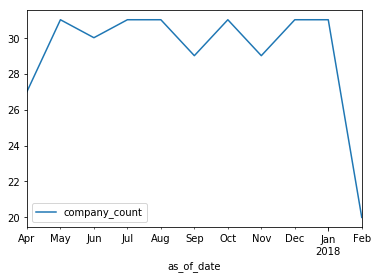

In [155]:
bio[bio.company_name == 'Versartis, Inc.'].plot(x = 'as_of_date', y='company_count')

Seems tricky to determine top growing companies as most are posting every day for the last year of the data set. Would need more data to separate these companies such as stock, VC funding, etc.